In [1]:
# set up working catalog
import sys
from pathlib import Path
project_path = str(Path().cwd().parent.parent.resolve())
if project_path not in sys.path:
    sys.path.append(project_path)
    
import warnings
warnings.filterwarnings("ignore")
    
# imports
from common.utils import get_data, train_with_plot

from sklearn.linear_model import LogisticRegression

In [2]:
data = get_data()
X = data.drop(columns=["Target"])
y = data["Target"]

data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,6th choice,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Ed 3rd Cycle,Other - 11th Year,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),2nd choice,Tourism,Daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year or Eq.,Higher Ed - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,6th choice,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic Ed 1st Cycle (4th/5th),Basic Ed 1st Cycle (4th/5th),...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,3rd choice,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Ed 2nd Cycle (6th–8th),Basic Ed 1st Cycle (4th/5th),...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,2nd choice,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic Ed 1st Cycle (4th/5th),Basic Ed 2nd Cycle (6th–8th),...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


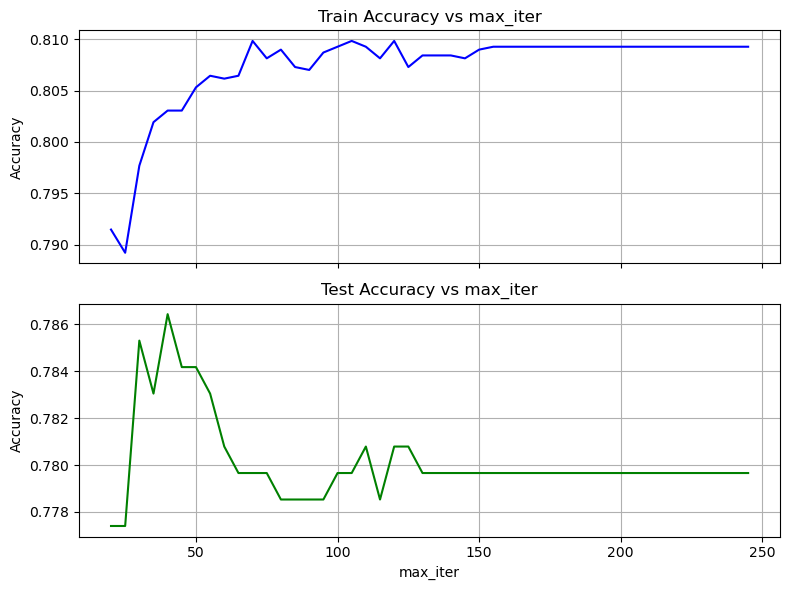

In [3]:
train_with_plot(LogisticRegression, X, y, end=250)

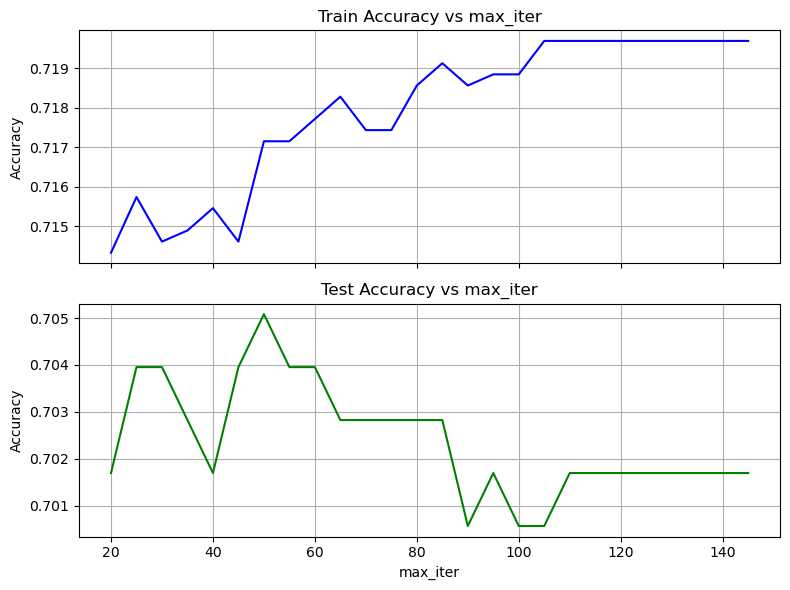

In [4]:
X_reduced_features = X[["Age at enrollment", "GDP", "Unemployment rate", "Inflation rate",
    "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)",
    "Admission grade", "Previous qualification (grade)", 
    "Marital status", "Application mode", "Application order", "Daytime/evening attendance",
    "Displaced", "Debtor", "Scholarship holder", "Gender",
    "Mother's occupation", "Father's occupation",
    "Mother's qualification", "Father's qualification"]]

train_with_plot(LogisticRegression, X_reduced_features, y, end=150)

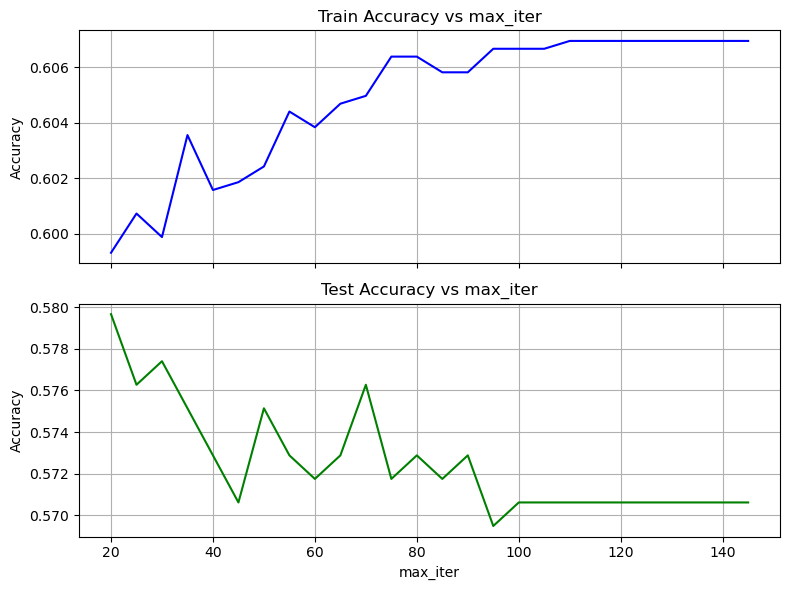

In [5]:
X_economic = X[["Age at enrollment", "GDP", "Unemployment rate", "Inflation rate",
    "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation",
    "Debtor", "Scholarship holder"
]]

train_with_plot(LogisticRegression, X_economic, y, end=150)

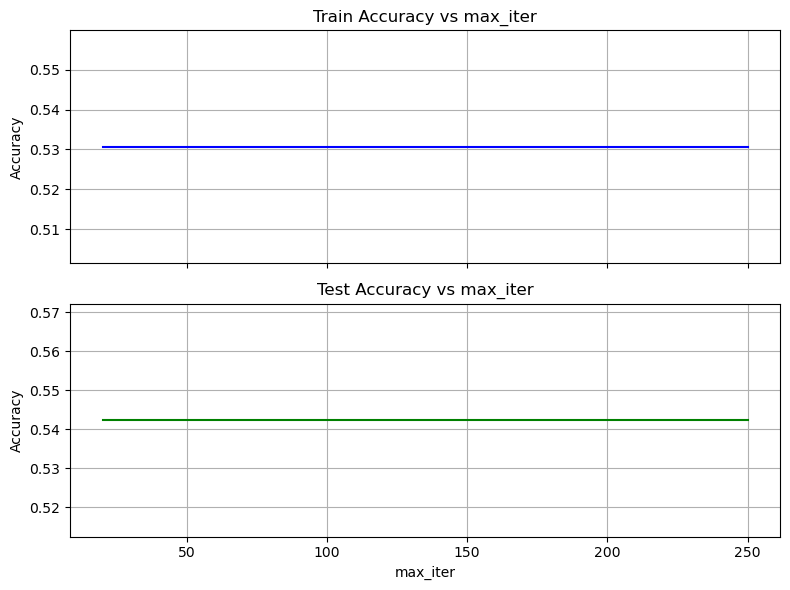

In [6]:
X_age = X[["Age at enrollment"]]

train_with_plot(LogisticRegression, X_age, y)